# Load all important modules

In [33]:
!pip3 install mtcnn
!pip3 install tensorflow
!pip3 install cvlib

import os
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import skimage.morphology as morph
from skimage import color, transform, feature
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from itertools import chain
from sklearn.feature_extraction.image import PatchExtractor
from sklearn.cluster import KMeans
from mtcnn.mtcnn import MTCNN
import cvlib as cv
from cvlib.object_detection import draw_bbox

warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


# Notebook contains below work:

1. Edge detection using Sobel Kernel (Manual Method)
2. Edge detection using Prewitt Kernel (Manual Method)
3. Edge detection using Scharr Kernel (Manual Method)
4. Edge detection using Laplacian Kernel (Manual Method)
5. Canny Edge Detection using Schar Kernel (Manual Method)
6. Image Segmentation using HSV + Thresholding
7. Image Segmentation using SVM & HOG Approach
8. Image Segmentation using K-Means Cluster Approach
9. Image Segmentation using Deep Learning MTCNN
10. Image Segmentation using Deep Learning OpenCV's CVLIB

# 1st Edge Detection using Sobel Kernel (Manual Method)

### Steps

1. Load the image
3. Apply Gaussian blur to reduce noise before Sobel
4. Define the Sobel X and Y kernels
5. Convolve the image
6. Compute gradient magnitude
7. Normalize to [0..255] for display
8. Thresholding, removing weak edges
9. Display the result with Matplotlib sie by side using figsize

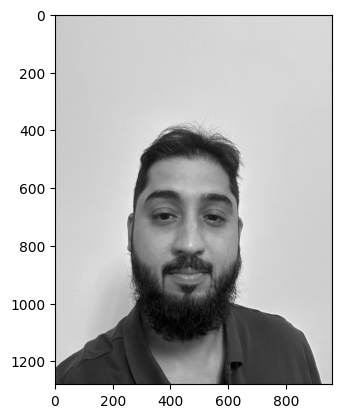

In [34]:
img = cv2.imread('aziz.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

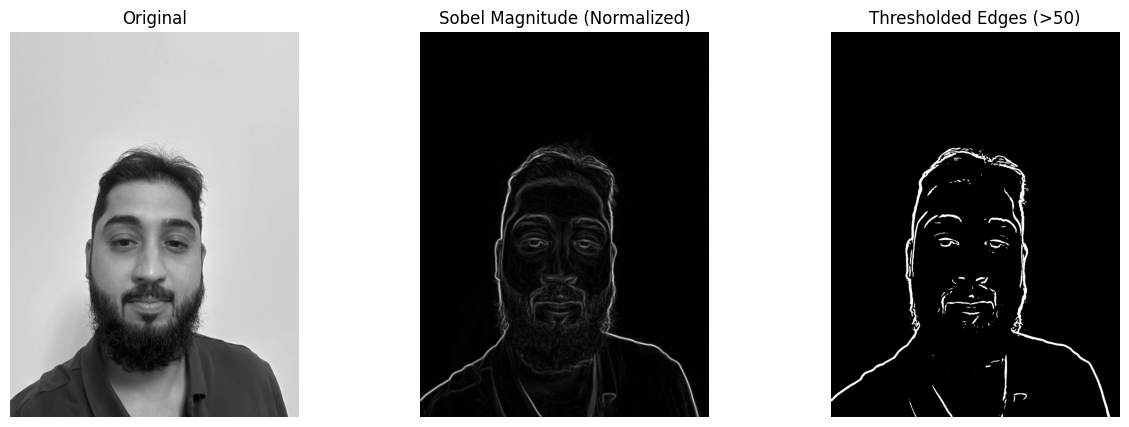

In [35]:
img = img.astype(np.float32) / 255.0

blurred = ndimage.gaussian_filter(img, sigma=2)

sobel_x = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

Gx = ndimage.convolve(blurred, sobel_x)
Gy = ndimage.convolve(blurred, sobel_y)

magnitude = np.hypot(Gx, Gy)

min_val = magnitude.min()
max_val = magnitude.max()
magnitude_norm = (magnitude - min_val) / (max_val - min_val)
magnitude_255 = (magnitude_norm * 255.0).astype(np.uint8)

threshold_value = 50
otsu, edge_binary = cv2.threshold(magnitude_255, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_255, cmap='gray')
plt.title("Sobel Magnitude (Normalized)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edge_binary, cmap='gray')
plt.title(f"Thresholded Edges (>{threshold_value})")
plt.axis('off')

plt.show()

# 2nd Edge Detection using Prewitt Kernel (Manual Method)

### Steps

1. Apply Gaussian blur to reduce noise before Prewitt
2. Define the Prewitt X and Y kernels
3. Convolve the image
4. Compute gradient magnitude
5. Normalize to [0..255] for display
6. Thresholding, removing weak edges
7. Display the result with Matplotlib sie by side using figsize

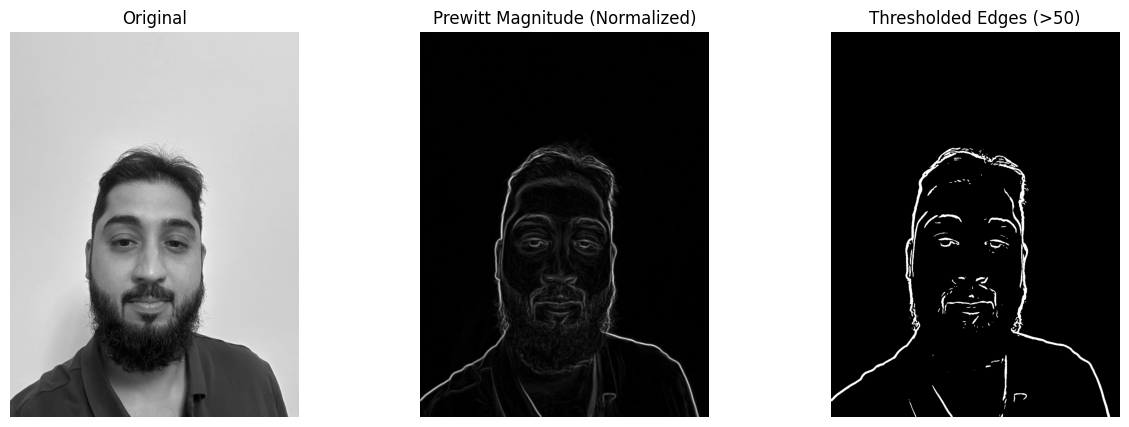

In [36]:
img = img.astype(np.float32) / 255.0

blurred = ndimage.gaussian_filter(img, sigma=2)

prewitt_x = np.array([[-1,  0,  1],
                      [-1,  0,  1],
                      [-1,  0,  1]], dtype=np.float32)

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]], dtype=np.float32)

Gx = ndimage.convolve(blurred, prewitt_x)
Gy = ndimage.convolve(blurred, prewitt_y)

prewitt_magnitude = np.hypot(Gx, Gy)

min_val = prewitt_magnitude.min()
max_val = prewitt_magnitude.max()
shifted = prewitt_magnitude - min_val
if (max_val - min_val) != 0:
    scaled = (shifted / (max_val - min_val)) * 255.0
else:
    scaled = shifted
prewitt_8u = scaled.astype(np.uint8)

threshold_value = 50
otsu, edges_binary = cv2.threshold(prewitt_8u, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(prewitt_8u, cmap='gray')
plt.title("Prewitt Magnitude (Normalized)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges_binary, cmap='gray')
plt.title(f"Thresholded Edges (>{threshold_value})")
plt.axis('off')

plt.show()


# 3rd Edge Detection using Schar Kernel (Manual Method)

### Steps

1. Apply Gaussian blur to reduce noise before Scharr
2. Define the Scharr X and Y kernels
3. Convolve the image
4. Compute gradient magnitude
5. Normalize to [0..255] for display
6. Thresholding, removing weak edges
7. Display the result with Matplotlib sie by side using figsize

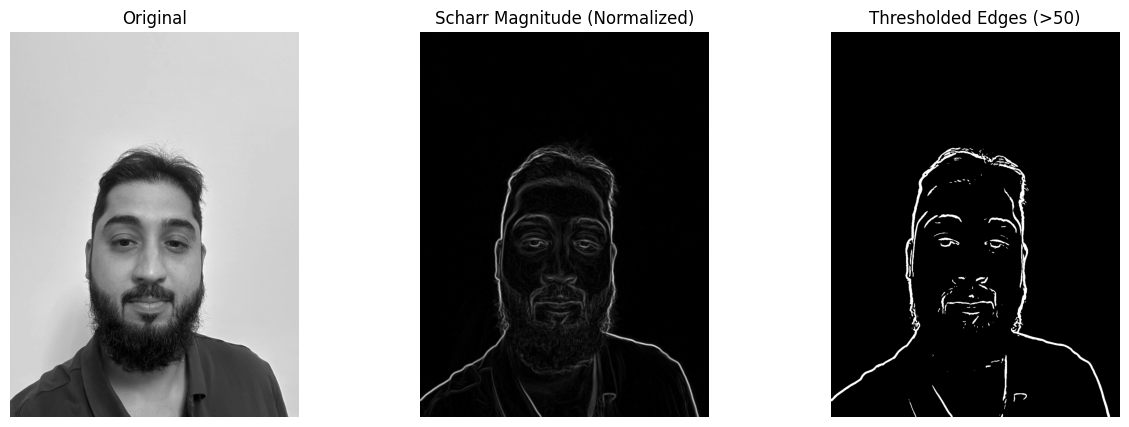

In [37]:
img = img.astype(np.float32) / 255.0

blurred = ndimage.gaussian_filter(img, sigma=2)

scharr_x = np.array([
    [-3,  0,  3],
    [-10, 0, 10],
    [ -3,  0,  3]
], dtype=np.float32)

scharr_y = np.array([
    [-3, -10, -3],
    [ 0,   0,  0],
    [ 3,  10,  3]
], dtype=np.float32)

Gx = ndimage.convolve(blurred, scharr_x)
Gy = ndimage.convolve(blurred, scharr_y)

magnitude = np.hypot(Gx, Gy)  # same as sqrt(Gx**2 + Gy**2)

min_val = magnitude.min()
max_val = magnitude.max()
magnitude_norm = (magnitude - min_val) / (max_val - min_val + 1e-8)  # avoid /0
magnitude_255 = (magnitude_norm * 255.0).astype(np.uint8)

threshold_value = 50
otsu, edge_binary = cv2.threshold(magnitude_255, threshold_value, 255, cv2.THRESH_BINARY)

# 8) Display three subplots
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_255, cmap='gray')
plt.title("Scharr Magnitude (Normalized)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edge_binary, cmap='gray')
plt.title(f"Thresholded Edges (>{threshold_value})")
plt.axis('off')

plt.show()

# 4th Edge Detection using Laplacian Kernel (Manual Method)

### Steps

1. Load the image
2. Convert to grayscale.
3. Apply Gaussian blur to reduce noise before Sobel
4. Define the Laplacian kernel
5. Convolve the image
6. Normalize the Laplacian response to the [0..255] range for display
7. Thresholding, removing weak edges
8. Display the result with Matplotlib sie by side using figsize

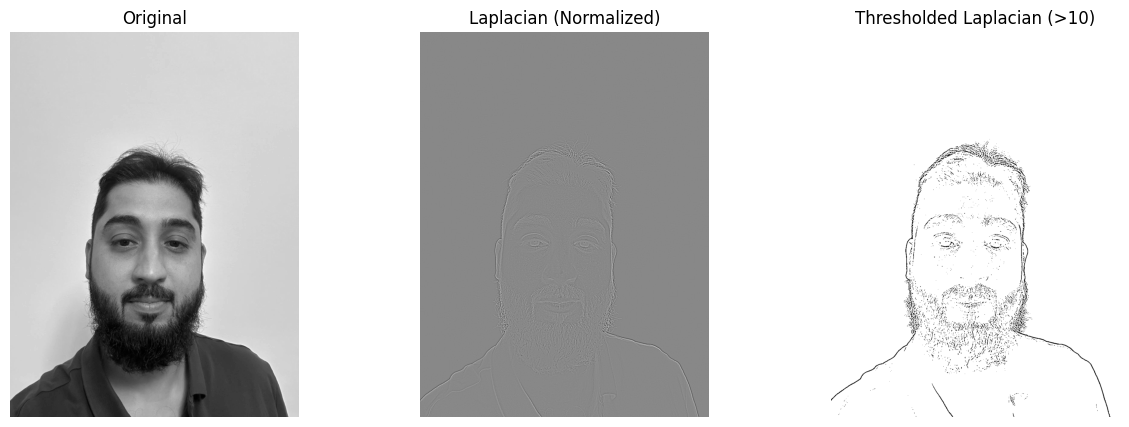

In [38]:
img_bgr = cv2.imread("aziz.jpeg")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_float = img_gray.astype(np.float32) / 255.0

blurred = ndimage.gaussian_filter(img_float, sigma=1)

lap_kernel = np.array([[ 0,  1,  0],
                       [ 1, -4,  1],
                       [ 0,  1,  0]], dtype=np.float32)

lap_response = ndimage.convolve(blurred, lap_kernel)

min_val, max_val = lap_response.min(), lap_response.max()
lap_norm = (lap_response - min_val) / (max_val - min_val)
lap_255 = (lap_norm * 255.0).astype(np.uint8)

threshold_value = 10
otsu, lap_binary = cv2.threshold(lap_255, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lap_255, cmap='gray')
plt.title("Laplacian (Normalized)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lap_binary, cmap='gray')
plt.title(f"Thresholded Laplacian (>{threshold_value})")
plt.axis('off')

plt.show()


# Canny Edge Detection using Schar Kernel (Manual Method)

### Steps

1. Normalize the image and apply a Gaussian blur to reduce noise and smooth the image.
2. Define the Scharr kernels for both the X and Y directions to detect horizontal and vertical edges.
3. Convolve the image with the Scharr X and Y kernels to compute the derivatives in both directions.
4. Calculate the gradient magnitude by combining the X and Y derivatives (e.g., using the Euclidean norm) to measure edge strength.
5. Perform Non-Maximum Suppression to thin the edges by keeping only the local maxima in the gradient direction.
6. Apply a Double Threshold and Hysteresis to classify pixels as strong, weak, or non-edges and link weak edges to strong ones.
7. Normalize the final edge map to the range [0, 255] for proper display as an 8-bit image.
8. Display the original and processed images side by side using Matplotlib with a specified figsize for clear comparison.

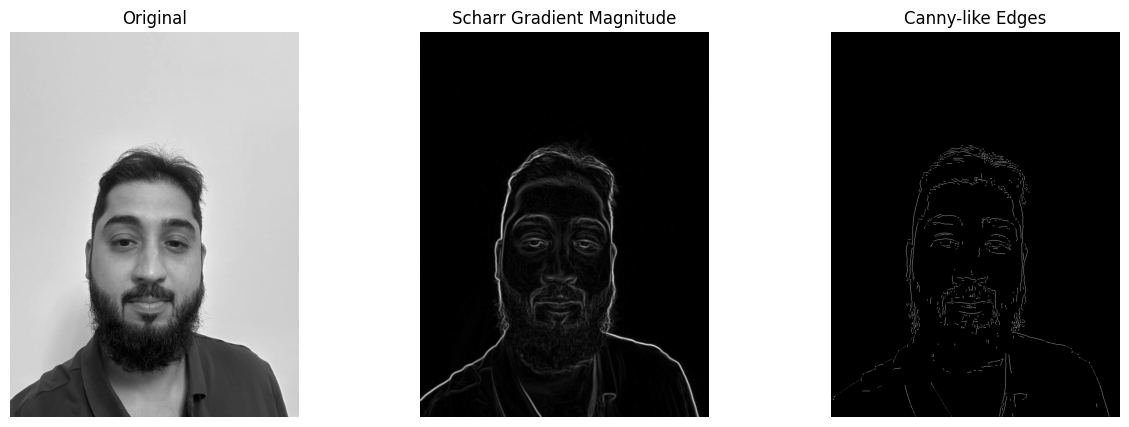

In [39]:
img = img.astype(np.float32) / 255.0

blurred = ndimage.gaussian_filter(img, sigma=2)

scharr_x = np.array([
    [-3,  0,  3],
    [-10, 0, 10],
    [ -3,  0,  3]
], dtype=np.float32)

scharr_y = np.array([
    [-3, -10, -3],
    [ 0,   0,  0],
    [ 3,  10,  3]
], dtype=np.float32)

Gx = ndimage.convolve(blurred, scharr_x)
Gy = ndimage.convolve(blurred, scharr_y)

magnitude = np.hypot(Gx, Gy)
direction = np.arctan2(Gy, Gx)

rows, cols = magnitude.shape
nms = np.zeros_like(magnitude, dtype=np.float32)

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        angle_deg = (direction[i, j] * 180.0 / np.pi)
        if angle_deg < 0:
            angle_deg += 180.0

        mag_ij = magnitude[i, j]

        if (0 <= angle_deg < 22.5) or (157.5 <= angle_deg <= 180):
            neighbor1 = magnitude[i, j - 1]
            neighbor2 = magnitude[i, j + 1]
        elif (22.5 <= angle_deg < 67.5):
            neighbor1 = magnitude[i - 1, j + 1]
            neighbor2 = magnitude[i + 1, j - 1]
        elif (67.5 <= angle_deg < 112.5):
            neighbor1 = magnitude[i - 1, j]
            neighbor2 = magnitude[i + 1, j]
        else:
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if (mag_ij >= neighbor1) and (mag_ij >= neighbor2):
            nms[i, j] = mag_ij
        else:
            nms[i, j] = 0

max_nms = nms.max()
high_thresh = 0.15 * max_nms
low_thresh  = 0.1 * max_nms

strong_edges = np.zeros_like(nms, dtype=np.uint8)
weak_edges   = np.zeros_like(nms, dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        val = nms[i, j]
        if val >= high_thresh:
            strong_edges[i, j] = 255
        elif val >= low_thresh:
            weak_edges[i, j] = 255

canny_like = strong_edges.copy()

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if (weak_edges[i, j] == 255) and (canny_like[i, j] == 0):
            region = canny_like[i-1:i+2, j-1:j+2]
            if np.any(region == 255):
                canny_like[i, j] = 255

mag_min = magnitude.min()
mag_max = magnitude.max()
mag_shift = magnitude - mag_min
if mag_max != mag_min:
    mag_norm = (mag_shift / (mag_max - mag_min)) * 255.0
else:
    mag_norm = mag_shift
mag_8u = mag_norm.astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mag_8u, cmap='gray')
plt.title("Scharr Gradient Magnitude")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(canny_like, cmap='gray')
plt.title("Canny-like Edges")
plt.axis('off')

plt.show()

# Image Segmentation using HSV + Thresholding

### Steps

1. Convert the image to HSV color space.
2. Display the original image along with the separate HSV channels (Hue, Saturation, and Value) in different subplots.
3. Define threshold ranges for the HSV channels to isolate the desired features.
4. Build a binary mask by applying these HSV thresholds to the image.
5. Apply morphological closing to the mask to fill small gaps.
6. Remove small holes and objects from the mask to clean up noise.
7. Create the final refined mask based on these operations.
8. Use the final mask to segment the face from the image.
9. Display the results, showing the original image, the HSV channels, and the segmented face.

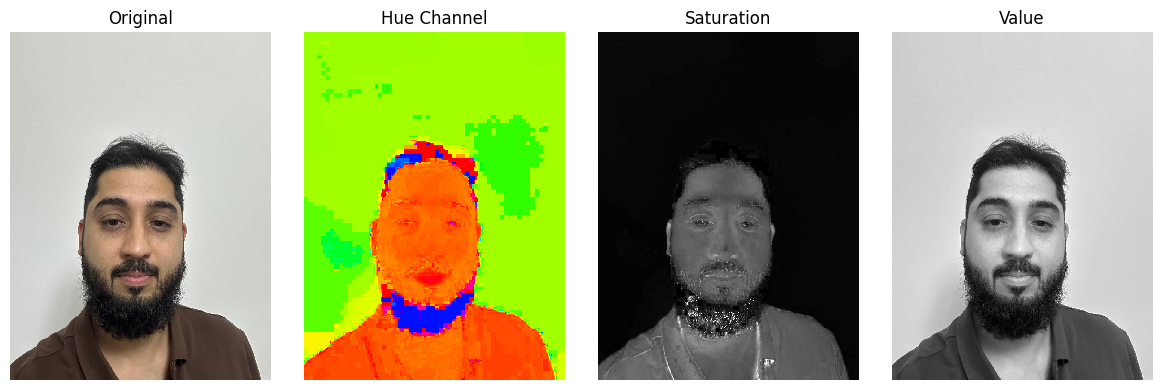

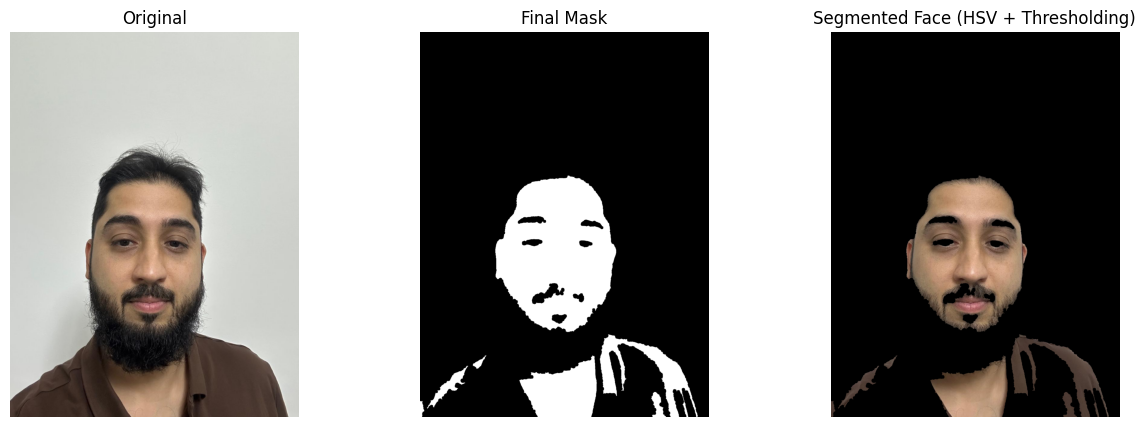

In [40]:
img = imread('aziz.jpeg')
image_hsv = rgb2hsv(img)

plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,4,2)
imshow(image_hsv[:,:,0], cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(1,4,3)
imshow(image_hsv[:,:,1], cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(1,4,4)
imshow(image_hsv[:,:,2], cmap='gray')
plt.title("Value")
plt.axis('off')

plt.tight_layout()
plt.show()

lower_hue = 0.0
upper_hue = 0.1
lower_sat = 0.2
upper_sat = 0.7
lower_val = 0.3
upper_val = 1.0

mask = ((image_hsv[:,:,0] >= lower_hue) & (image_hsv[:,:,0] <= upper_hue) &
        (image_hsv[:,:,1] >= lower_sat) & (image_hsv[:,:,1] <= upper_sat) &
        (image_hsv[:,:,2] >= lower_val) & (image_hsv[:,:,2] <= upper_val))

mask_uint8 = mask.astype(np.uint8)


mask_closed = morph.closing(mask_uint8, morph.disk(5))

mask_cleaned = morph.remove_small_holes(mask_closed.astype(bool), area_threshold=500)
mask_cleaned = morph.remove_small_objects(mask_cleaned, min_size=500)

mask_cleaned = mask_cleaned.astype(np.uint8)

segmented_face = img.copy()
segmented_face[mask_cleaned == 0] = 0

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].imshow(img)
axis[0].set_title("Original")
axis[0].axis('off')

axis[1].imshow(mask_cleaned, cmap='gray')
axis[1].set_title("Final Mask")
axis[1].axis('off')

axis[2].imshow(segmented_face)
axis[2].set_title("Segmented Face (HSV + Thresholding)")
axis[2].axis('off')

plt.show()


# Image Segmentation using SVM & HOG Approach

### Steps

1. Fetch positive images from the LFW dataset and get the size (Ni, Nj) from one of the images.
2. Load images that do not contain faces (negative images).
3. Write a function to extract patches from an image; it should take an image, the number of patches, a scaling factor, and a patch size as input.
4. Loop through each negative image and, for scales 0.5, 1.0, and 2.0, use the patch extraction function to get 300 patches per scale.
5. Write a function to compute the HOG features for an image patch and return the result.
6. Build the training data by computing HOG features for all patches and create labels: mark face patches as 1 and non-face patches as 0.
7. Use GridSearchCV to train a LinearSVC, tuning the regularization parameter C for the best performance.
8. Load the test image and pre-process it as needed.
9. Write a sliding window function that moves over the test image in steps and yields each patch along with its top-left coordinate.
10. Loop over different scales and use the sliding window function to detect faces in the test image.
11. Calculate a bounding box that covers the detected face region.
12. Show the test image, the segmented patches, and the final detected face (with the bounding box drawn) side by side.


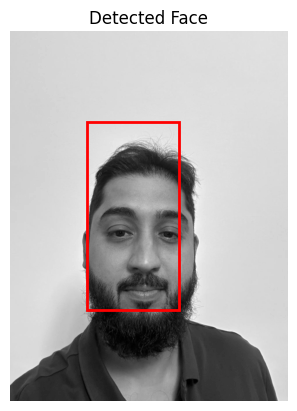

In [ ]:
faces = fetch_lfw_people()
positive_patches = faces.images
Ni, Nj = positive_patches[0].shape

negatives_patches = r'<change_with_your_path>'
images = []

for file in os.listdir(negatives_patches):
    filename = os.fsdecode(file)
    if filename.lower().endswith(".jpg"):
        full_path = os.path.join(negatives_patches, filename)
        img_bgr = cv2.imread(full_path)
        if img_bgr is not None:
            img_gray = color.rgb2gray(img_bgr)
            images.append(img_gray)

def extract_patches(img, N, scale=1.0, patch_size=(62, 47)):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N,
                               random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(p, patch_size) for p in patches])
    return patches

negative_patches_list = []
for im in images:
    for scale in [0.5, 1.0, 2.0]:
        negs = extract_patches(im, N=300, scale=scale, patch_size=(Ni, Nj))
        negative_patches_list.append(negs)

negative_patches = np.vstack(negative_patches_list)

def hog_features(img):
    hog_result = feature.hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9, block_norm='L2-Hys')
    return hog_result

X_train = np.array([hog_features(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0], dtype=int)
y_train[:positive_patches.shape[0]] = 1

param_grid = {'C': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(LinearSVC(max_iter=5000), param_grid, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
model.fit(X_train, y_train)

test_bgr = cv2.imread("aziz.jpeg")

test_gray = color.rgb2gray(test_bgr)

test_gray = transform.rescale(test_gray, 0.5)

def sliding_window(img, patch_size=(62, 47), step=3):
    Ni, Nj = patch_size
    for i in range(0, img.shape[0] - Ni, step):
        for j in range(0, img.shape[1] - Nj, step):
            patch = img[i:i+Ni, j:j+Nj]
            yield (i, j), patch

scales = [0.5, 1.0, 1.5]
all_coords = []
threshold_score = 0.7

for scale in scales:
    scaled_img = transform.rescale(test_gray, scale)
    
    window_data = sliding_window(scaled_img, (Ni, Nj), step=3)
    coords, patches = zip(*window_data)
    coords = np.array(coords)
    
    hog_list = []
    for patch in patches:
        hog = hog_features(patch)
        hog_list.append(hog)
    hogs = np.array(hog_list)
    
    scores = model.decision_function(hogs)
    
    face_mask = scores > threshold_score
    face_coords = coords[face_mask]
    
    scale_factor = 1.0 / scale
    scaled_face_coords = face_coords * scale_factor
    face_coords_original = scaled_face_coords.astype(int)
    
    all_coords.extend(face_coords_original)

fig, ax = plt.subplots()
ax.imshow(test_gray, cmap='gray')
ax.axis('off')

all_coords = np.array(all_coords)
min_i, max_i = np.min(all_coords[:,0]), np.max(all_coords[:,0])
min_j, max_j = np.min(all_coords[:,1]), np.max(all_coords[:,1])

top_left = (min_j, min_i)
height   = (max_i - min_i) + Ni
width    = (max_j - min_j) + Nj

rect = plt.Rectangle(top_left, width, height, edgecolor='red', facecolor='none', lw=2)
ax.add_patch(rect)
plt.title("Detected Face")

plt.show()


# Image Segmentation using K-Means Cluster Approach

### Steps

1. Load “aziz.jpeg” in BGR, convert to RGB, then LAB.
2. Reshape LAB into a 2D array and cast to float32.
3. Set criteria, attempts, and random-centers flags for cv2.kmeans.
4. For k=1..10, run k-means, record compactness, and store in inertia_values.
5. Graph inertia_values vs. k to pick the best cluster count.
6. Re-run k-means with the selected k=4 to get labels and centers.
7. Convert centers to uint8, reshape them into the original LAB shape, and then convert back to RGB.
8. Display the RGB image on the first subplot with no axes.
9. Plot the segmented image on the second subplot, adjust layout, and call plt.show().

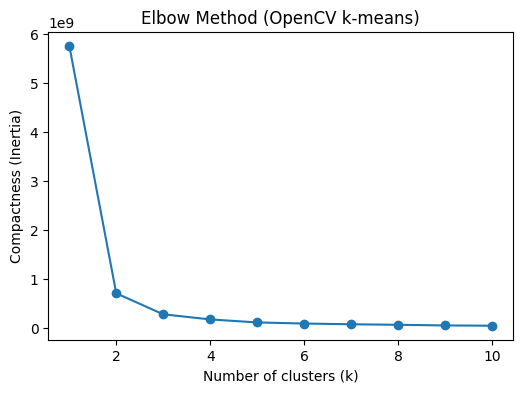

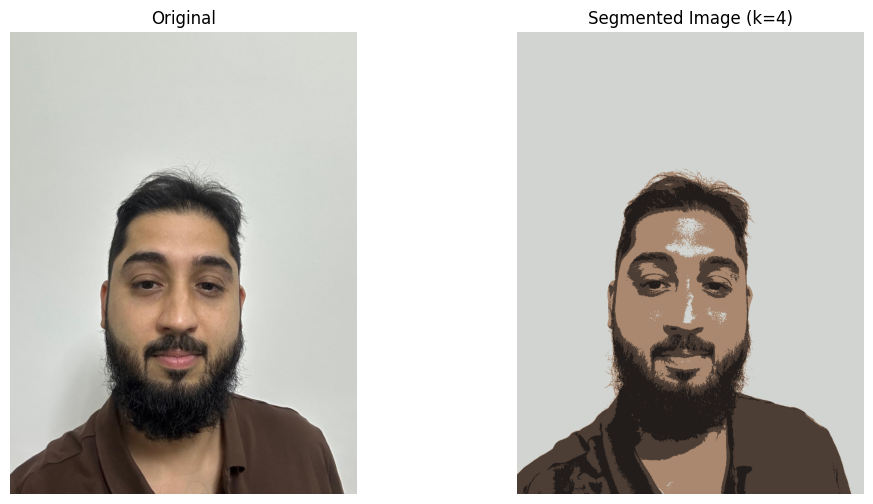

In [42]:
image = cv2.imread("aziz.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

pixel_values = image_lab.reshape((-1, 3)).astype(np.float32)

inertia_values = []
criteria = (cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
attempts = 10
flags = cv2.KMEANS_RANDOM_CENTERS

for k in range(1, 11):
    compactness, _, _ = cv2.kmeans(
        data=pixel_values,
        K=k,
        bestLabels=None,
        criteria=criteria,
        attempts=attempts,
        flags=flags
    )
    inertia_values.append(compactness)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Compactness (Inertia)")
plt.title("Elbow Method (OpenCV k-means)")
plt.show()

k = 4
compactness, labels, centers = cv2.kmeans(
    data=pixel_values,
    K=k,
    bestLabels=None,
    criteria=criteria,
    attempts=attempts,
    flags=flags
)

centers = np.uint8(centers)

segmented_lab = centers[labels.flatten()].reshape(image_lab.shape)
segmented_rgb = cv2.cvtColor(segmented_lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb)
plt.title(f"Segmented Image (k={k})")
plt.axis("off")

plt.show()


# Image Segmentation using Deep Learning MTCNN 

### Steps

1. Load the image in BGR format, create a copy for later use, and convert it from BGR to RGB so that the colors are correct for face detection.
2. Keep a duplicate of the original image (still in BGR) to later display the unaltered version after converting it to RGB.
3. Initialize the MTCNN face detector by creating an instance of the MTCNN class.
4. Run the MTCNN detector on the RGB image to detect faces, returning a list of detection dictionaries.
5. Count the number of faces detected and print the detection details (bounding box coordinates and confidence values).
6. For each detected face with a confidence above 0.6, draw a green bounding box on the RGB image to mark the face location.
7. Convert the original image copy from BGR to RGB for proper color display when showing the original image.
8. Set up Matplotlib to display images side by side by creating subplots and assigning appropriate titles.
9. Show the original image and the image with detected faces (with bounding boxes) side by side using Matplotlib with a specified figure size.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[{'box': [272, 513, 369, 499], 'confidence': 1.0, 'keypoints': {'left_eye': (379, 694), 'right_eye': (549, 704), 'nose': (464, 802), 'mouth_left': (395, 891), 'mouth_right': (522, 895)}}]
Number of faces detected: 1
Box: [272, 513, 369, 499]
Confidence: 1.0


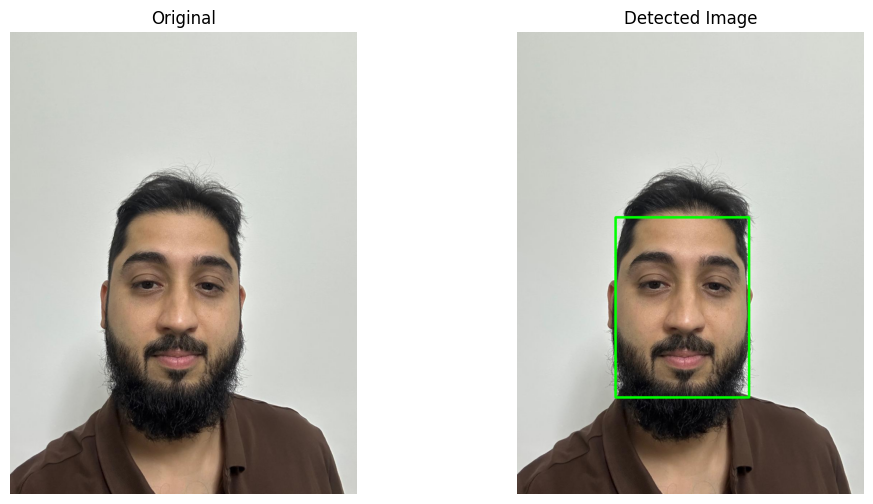

In [43]:
bgr_image = cv2.imread('aziz.jpeg')

original_image = bgr_image.copy()

rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

model = MTCNN()
print(model)

output = model.detect_faces(rgb_image)
print(output)

face_count = len(output)
print("Number of faces detected:", face_count)

for i in range(face_count):
    box = output[i]['box']
    conf = output[i]['confidence']
    print("Box:", box)
    print("Confidence:", conf)
    if conf > 0.6:
        cv2.rectangle(
            rgb_image,
            (box[0], box[1]),
            (box[0] + box[2], box[1] + box[3]),
            (0, 255, 0),
            6
        )

original_disp = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_disp)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title("Detected Image")
plt.axis("off")

plt.show()


# Image Segmentation using Deep Learning with OpenCV's CVLIB

### Steps

1. Load "aziz.jpeg" using OpenCV (in BGR format) and create a copy of the image for later use.
2. Keep a duplicate of the original image (still in BGR) so that you can display the unaltered version after converting it to RGB.
3. Use cvlib’s detect_face() function on the loaded image to detect faces, which returns bounding boxes and confidence scores.
4. Generate a list of labels (using "person" for each detected face) to annotate the detections.
5. Create a list of colors (using the BGR tuple (0, 255, 0) for green) for drawing the bounding boxes.
6. Use cvlib’s draw_bbox() function with the bounding boxes, labels, confidence scores, and custom colors to draw bounding boxes on the image.
7. Convert the original image copy from BGR to RGB so that the colors are displayed correctly in Matplotlib.
8. Create a Matplotlib figure with a specified size (12×6 inches) and set up subplots to display images side by side.
9. Display the original image and the image with detected faces (with bounding boxes) in the subplots, each with an appropriate title and no axis labels.

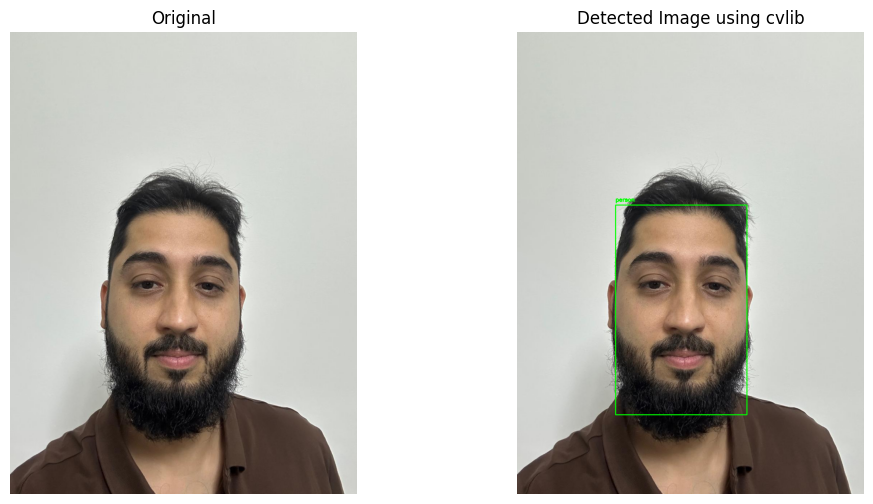

In [44]:
image = cv2.imread('aziz.jpeg')

original_image = image.copy()

faces, confidences = cv.detect_face(image)

labels = ['person'] * len(faces)

colors = [(0, 255, 0)] * len(labels)

output_image = draw_bbox(image, faces, labels, confidences, colors=colors)

original_disp = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_disp)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_image_rgb)
plt.title("Detected Image using cvlib")
plt.axis("off")

plt.show()